<a href="https://colab.research.google.com/github/Heilley/Grocery_Sales_Prediction/blob/main/Machine_Learning__Prediction_of_Parkinson's_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Detecting Parkinson's Disease Using Machine Learning**


> **Halima Bulama-Ladan**


> **03/31/2022**





##**Parkinson's Disease:**


> Parkinson's disease is an ongoing, progressive disease of the nervous system that affects a patient's movement. Millions of individuals worldwide are diagnosed with Parkinson's disease. The cause of Parkinson's disease is presently not known. However, research attributes the disease to a combination of genetic and environmental factors. Age also plays a role. Most cases of Parkinson's disease begins after an individual is sixty years old.

>Unfortunately, there is currently no cure for Parkinson's disease. There are, however, medications to surpress the symptoms of the disease. Occupational therapy is also plays a huge part of treating Parkinson's disease. Overall, this condition requires intense treatment and symptom management for a patient to live a full life.

##**Major Early Symptom:**

>Parkinson’s disease patients typically have a low-volume voice with a monotone (expressionless) quality. The speech pattern is often produced in short bursts with inappropriate silences between words and long pauses before initiating speech. The speech may also be slurred. A small percentage of patients (about 15 percent) may also have a tremulous voice





##**Project Objectives**


> The objectives of this project, is to build three different models using Random Forest Classifier, LGBMClassifier, XGBClassifier respectively to detect the presence of the disease in individuals at an early stage, using voice analysis. The performance of the three models will be evaluated using evaluation metric and the model with the best scores will be chosen.



#**Mounting Drive**

In [273]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Importing Libraries**

In [274]:
#libraries used in cleaning and visualizing and analysing datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing Libraries for preparing dataset into suitable machine learning format
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_selector, make_column_transformer


from imblearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn import set_config

set_config(display = "diagram")
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE


#Importing Machine learning models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, get_scorer, accuracy_score, recall_score, precision_score

##**Source of Data**

> The source of data for this project can be found [here](https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/).                  




##**Loading DataSet**

In [275]:
df =pd.read_csv("/content/parkinsons.data")
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


##**Data Information**

In [276]:
df.info()
#There are 195 rows and 24 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

##**Data Types**

In [277]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

##**Data Statistics**

In [278]:
df.describe().round(4)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.0000,195.0000,195.0000,195.0000,195.0000,195.0000,195.0000,195.0000,195.0000,195.0000,...,195.0000,195.0000,195.0000,195.0000,195.0000,195.0000,195.0000,195.0000,195.0000,195.0000
mean,154.2286,197.1049,116.3246,0.0062,0.0000,0.0033,0.0034,0.0099,0.0297,0.2823,...,0.0470,0.0248,21.8860,0.7538,0.4985,0.7181,-5.6844,0.2265,2.3818,0.2066
std,41.3901,91.4915,43.5214,0.0048,0.0000,0.0030,0.0028,0.0089,0.0189,0.1949,...,0.0305,0.0404,4.4258,0.4319,0.1039,0.0553,1.0902,0.0834,0.3828,0.0901
min,88.3330,102.1450,65.4760,0.0017,0.0000,0.0007,0.0009,0.0020,0.0095,0.0850,...,0.0136,0.0006,8.4410,0.0000,0.2566,0.5743,-7.9650,0.0063,1.4233,0.0445
25%,117.5720,134.8625,84.2910,0.0035,0.0000,0.0017,0.0019,0.0050,0.0165,0.1485,...,0.0247,0.0059,19.1980,1.0000,0.4213,0.6748,-6.4501,0.1744,2.0991,0.1375
50%,148.7900,175.8290,104.3150,0.0049,0.0000,0.0025,0.0027,0.0075,0.0230,0.2210,...,0.0384,0.0117,22.0850,1.0000,0.4960,0.7223,-5.7209,0.2189,2.3615,0.1941
75%,182.7690,224.2055,140.0185,0.0074,0.0001,0.0038,0.0040,0.0115,0.0379,0.3500,...,0.0608,0.0256,25.0755,1.0000,0.5876,0.7619,-5.0462,0.2792,2.6365,0.2530
max,260.1050,592.0300,239.1700,0.0332,0.0003,0.0214,0.0196,0.0643,0.1191,1.3020,...,0.1694,0.3148,33.0470,1.0000,0.6852,0.8253,-2.4340,0.4505,3.6712,0.5274


Some columns have been observed to contain outliers. This will be investigated further and the neccessary action would be taken.

##**Data Cleaning Process**

###**Irrelevant Columns**

The names of the individuals whose voices were recorded for this data set is of no relevance to this project and hence will be dropped.

In [279]:
#Column "name" is not relevant to the prediction.
df = df.drop(columns = "name")
#Confirming changes
df.head(2)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674


##**Removal of Duplicates**

In [280]:
print(f'Duplicates: {df.duplicated().sum()}')

Duplicates: 0


There are no duplicates in this data set.

##**Checking for null Values**

In [281]:
df.isnull().sum()
#There are no null values in this data set

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

There are no null values in this data set.

##**Checking of inconsistencies(Outliers) in data**

###**Outliers**

In [282]:
#Creating a funcution to check outliers across all columns.

for column_name in df.columns:
   q1 = df[column_name].quantile(0.25) # 25th percentile
   q3 = df[column_name].quantile(0.75) # 75th percentile
   iqr = q3 - q1 # Interquartile range

   low_limit = q1 - (1.5 * iqr) # low limit
   high_limit = q3 + (1.5 * iqr) # high limit

# Create outlier dataframes
   low_df = df[(df[column_name] < low_limit)]
   high_df = df[(df[column_name] > high_limit)]

# Calculate the outlier counts and percentages
   low_oulier_count = low_df.shape[0]
   low_outlier_percentge = round(((low_oulier_count)/(df.shape[0])*100),1)
   high_oulier_count = high_df.shape[0]
   high_outlier_percentge = round(((high_oulier_count)/(df.shape[0])*100),1)

  
   print(f'\n{column_name}:\n  Low Outliers:{low_oulier_count} ({low_outlier_percentge}%),          High Outliers: {high_oulier_count} ({high_outlier_percentge}%)')
  


MDVP:Fo(Hz):
  Low Outliers:0 (0.0%),          High Outliers: 0 (0.0%)

MDVP:Fhi(Hz):
  Low Outliers:0 (0.0%),          High Outliers: 11 (5.6%)

MDVP:Flo(Hz):
  Low Outliers:0 (0.0%),          High Outliers: 9 (4.6%)

MDVP:Jitter(%):
  Low Outliers:0 (0.0%),          High Outliers: 14 (7.2%)

MDVP:Jitter(Abs):
  Low Outliers:0 (0.0%),          High Outliers: 7 (3.6%)

MDVP:RAP:
  Low Outliers:0 (0.0%),          High Outliers: 14 (7.2%)

MDVP:PPQ:
  Low Outliers:0 (0.0%),          High Outliers: 15 (7.7%)

Jitter:DDP:
  Low Outliers:0 (0.0%),          High Outliers: 14 (7.2%)

MDVP:Shimmer:
  Low Outliers:0 (0.0%),          High Outliers: 8 (4.1%)

MDVP:Shimmer(dB):
  Low Outliers:0 (0.0%),          High Outliers: 10 (5.1%)

Shimmer:APQ3:
  Low Outliers:0 (0.0%),          High Outliers: 6 (3.1%)

Shimmer:APQ5:
  Low Outliers:0 (0.0%),          High Outliers: 13 (6.7%)

MDVP:APQ:
  Low Outliers:0 (0.0%),          High Outliers: 12 (6.2%)

Shimmer:DDA:
  Low Outliers:0 (0.0%),          

The outliers of each column are less than 8% of the total percentage of values of the column, therefore all enteries with outliers will be located and dropped.

###**Exploring relations between all features and target feature, "status" using a barchart and a boxplot and removing outliers along the way**

In [283]:
def bar (u,v):
  plt.rcParams["figure.figsize"] = [28, 6]
  f, axes =plt.subplots(1,4)
  sns.set_theme(style="whitegrid")
  sns.barplot(ax = axes[0], x="status", y=u, data=df)
  sns.boxplot(ax = axes[1], x="status", y=u, data=df)
  sns.barplot(ax = axes[2], x="status", y=v, data=df)
  sns.boxplot(ax = axes[3], x="status", y=v, data=df)



**Defining a function to return the index numbers of all outliers which will be used in removing excessive outliers.**

In [284]:
def outliers (column_name, num):
  df[column_name] > num
  print( df[df[column_name] > num].index)


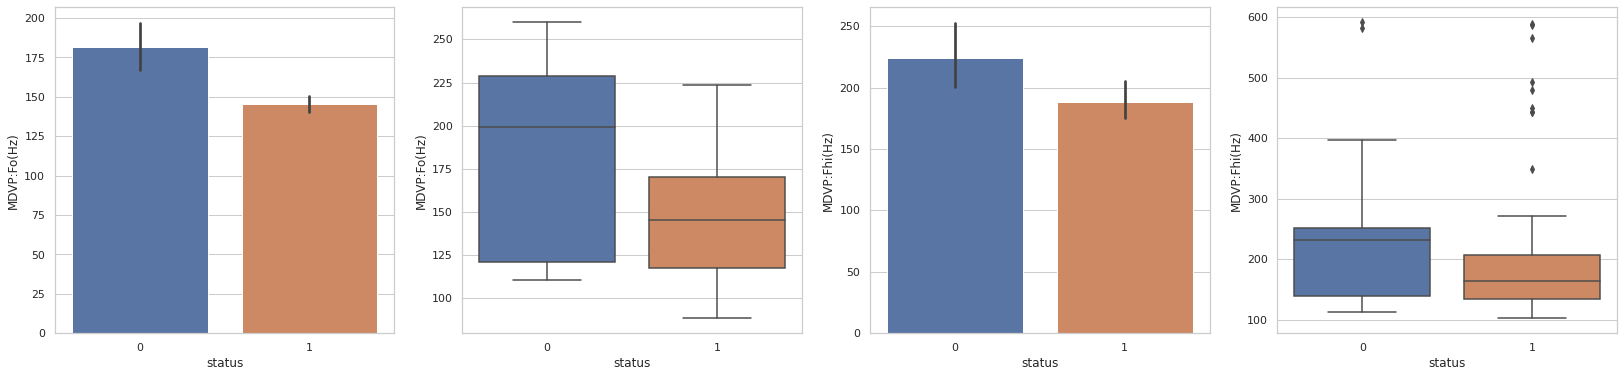

In [285]:
bar("MDVP:Fo(Hz)", "MDVP:Fhi(Hz)")

Individuals with PD have a lower MDVP:fo(HZ) and MDVP:fhi(HZ) than those who dont have it. No outliers were found for the MDVP:fo(HZ) but the MDVP:fhi(HZ) had some outliers as seen in the boxplot. 

In [286]:
#Locating the index numbers of enteries with outlier values.
outliers("MDVP:Fhi(Hz)", 400)

Int64Index([73, 102, 115, 116, 117, 118, 120, 149, 186, 187], dtype='int64')


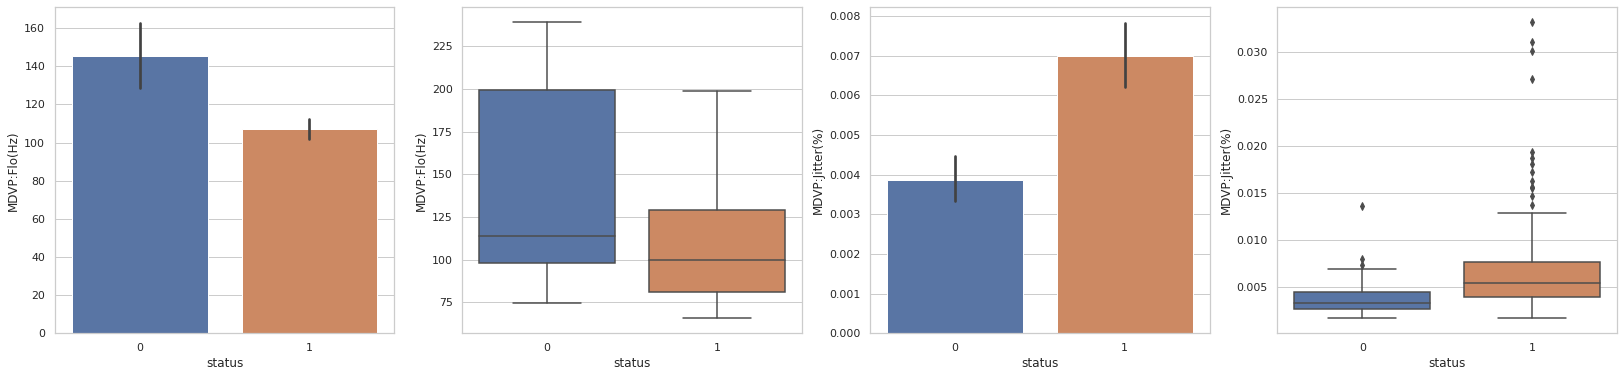

In [287]:
bar("MDVP:Flo(Hz)", "MDVP:Jitter(%)")

The MDVP:Flo(Hz) appears to be higher in those with PD and lower in those without it. The MDVP:Jitter(%) however is lower in those with PD and higher in those without it. It also contains some outliers. 

In [288]:
#Locating the index numbers of enteries with outlier values.
outliers("MDVP:Jitter(%)", 0.013)

Int64Index([98, 99, 100, 101, 102, 146, 147, 148, 149, 150, 151, 152, 157,
            192],
           dtype='int64')


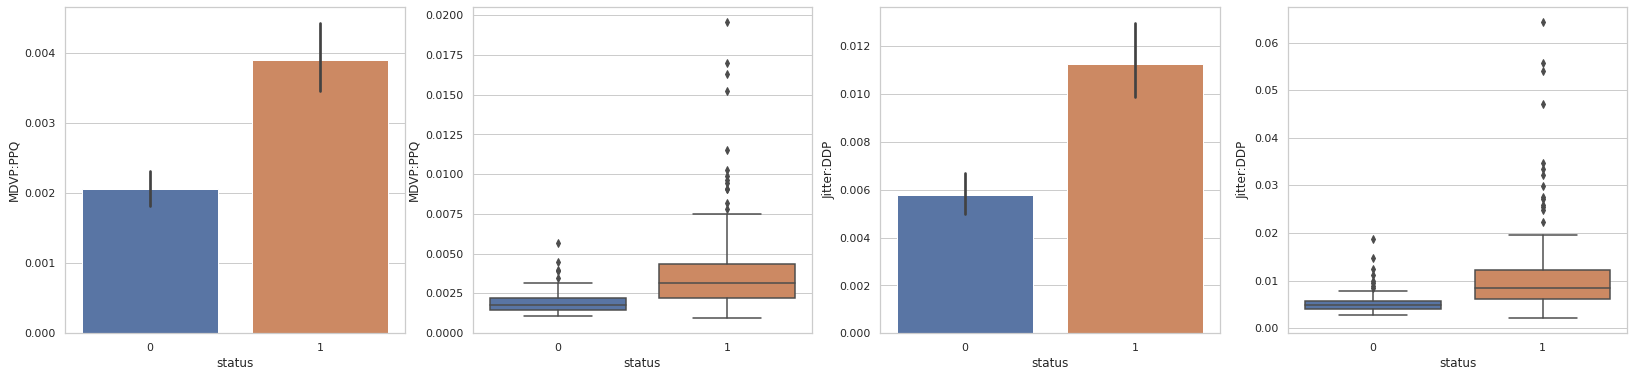

In [289]:
bar("MDVP:PPQ","Jitter:DDP")

Both MDVP:PPQ and Jitter:DDP have lower values in PD patients than that of those without it and They both contain outliers.

In [290]:
#Locating the index numbers of enteries with outlier values.
outliers("MDVP:PPQ",0.007)
outliers("Jitter:DDP", 0.02)

Int64Index([2, 4, 5, 99, 100, 101, 102, 146, 147, 148, 149, 150, 151, 152,
            157],
           dtype='int64')
Int64Index([97, 98, 99, 100, 101, 102, 146, 147, 148, 149, 150, 151, 152, 157], dtype='int64')


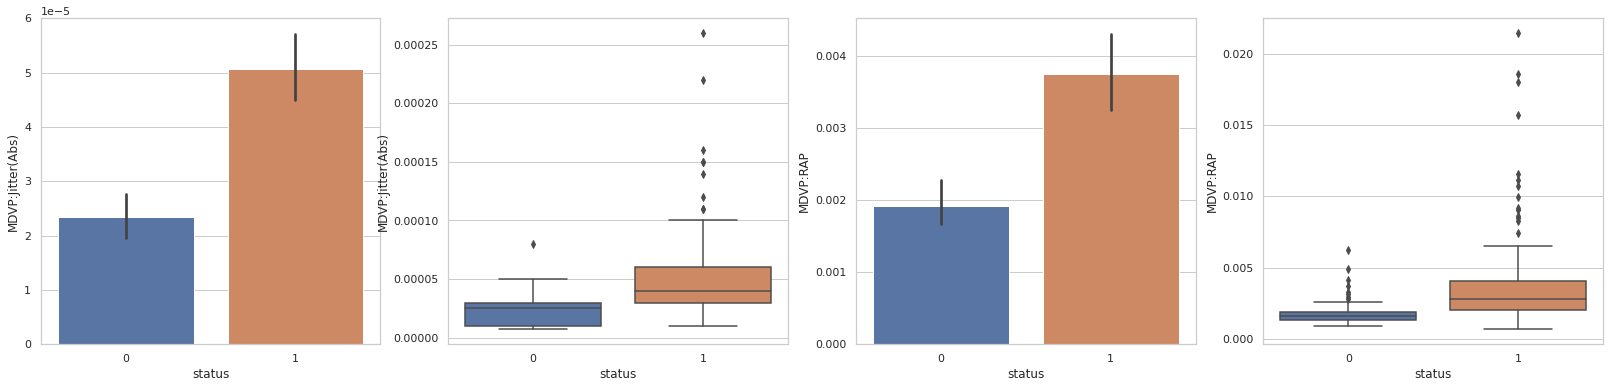

In [291]:
bar("MDVP:Jitter(Abs)","MDVP:RAP")

The values in MDVP:Jitter(Abs) and MDVP:RAP are much lower in individuals with PD than those without it and they both contain outliers.

In [292]:
#Locating the index numbers of enteries with outlier values.
outliers("MDVP:Jitter(Abs)",0.00010)
outliers("MDVP:RAP",0.007)

Int64Index([4, 98, 99, 100, 101, 102, 151, 152, 157], dtype='int64')
Int64Index([97, 98, 99, 100, 101, 102, 146, 147, 148, 149, 150, 151, 152, 157], dtype='int64')


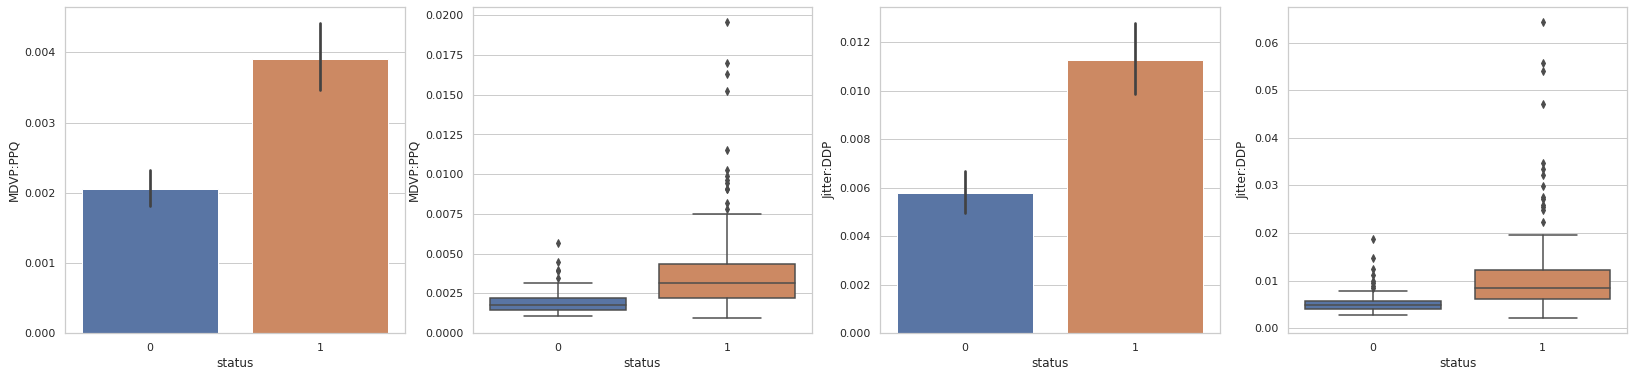

In [293]:
bar("MDVP:PPQ","Jitter:DDP")

The two features, MDVP:PPQ and Jitter:DDP are both higher in individuals without PD and lower in those out it. There are outliers present in both features.

In [294]:
#Locating the index numbers of enteries with outlier values.
outliers("MDVP:PPQ",0.007)
outliers("Jitter:DDP", 0.02)

Int64Index([2, 4, 5, 99, 100, 101, 102, 146, 147, 148, 149, 150, 151, 152,
            157],
           dtype='int64')
Int64Index([97, 98, 99, 100, 101, 102, 146, 147, 148, 149, 150, 151, 152, 157], dtype='int64')


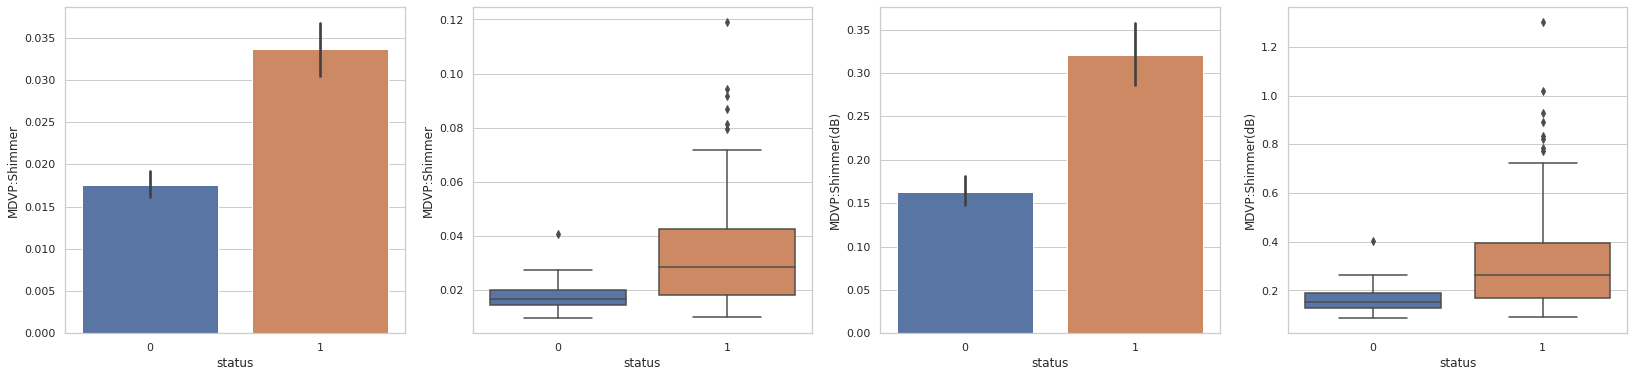

In [295]:
bar("MDVP:Shimmer", "MDVP:Shimmer(dB)")

MDVP:Shimmer and MDVP:Shimmer(dB) are both higher in individuals with PD than those without it.

In [296]:
#Locating the index numbers of enteries with outlier values.
outliers("MDVP:Shimmer",0.075)
outliers("MDVP:Shimmer(dB)", 0.7)

Int64Index([91, 100, 102, 146, 151, 152], dtype='int64')
Int64Index([91, 100, 102, 146, 148, 149, 150, 151, 152], dtype='int64')


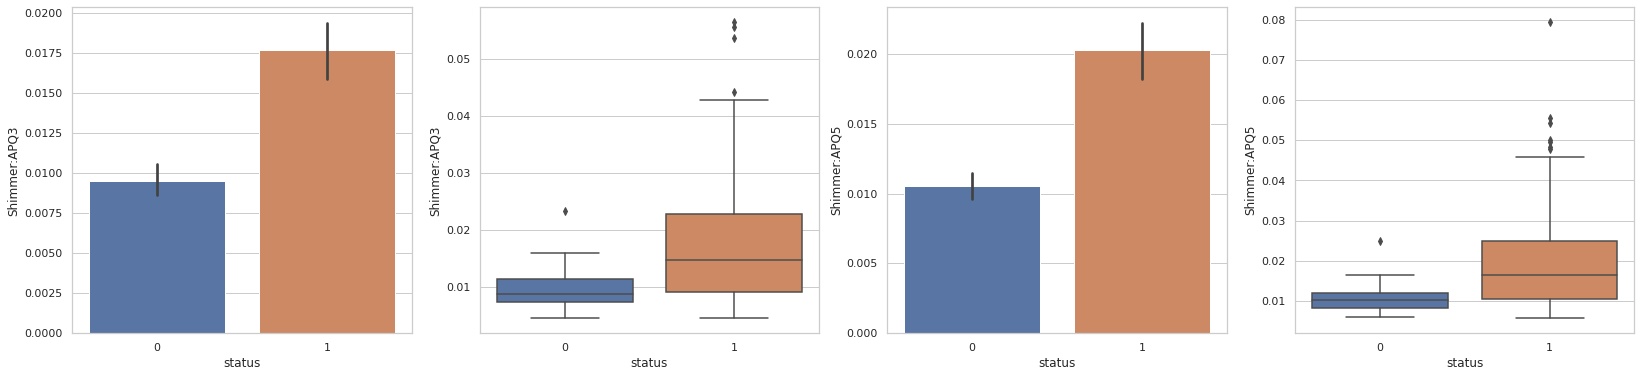

In [297]:
bar("Shimmer:APQ3", "Shimmer:APQ5")

Shimmer APQ3 and Shimmer APQ5 are both higher in individuals with PD than those without the disease.

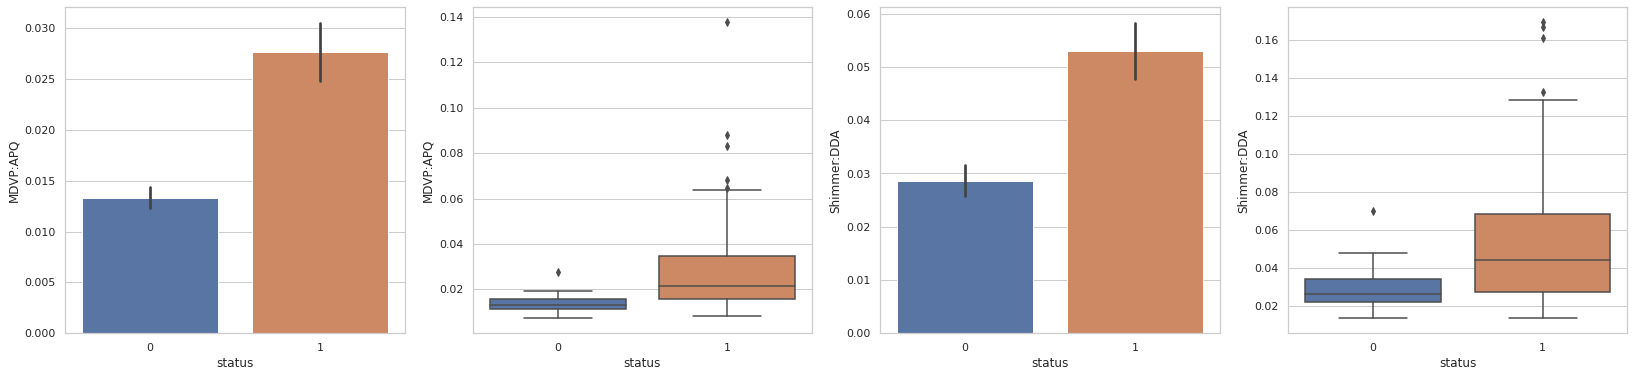

In [298]:
bar("MDVP:APQ","Shimmer:DDA")

In [299]:
#Locating the index numbers of enteries with outlier values.
outliers("MDVP:APQ",0.06)
outliers("Shimmer:DDA", 0.12)

Int64Index([100, 102, 146, 147, 148, 149, 150, 151, 152], dtype='int64')
Int64Index([91, 100, 102, 141, 151, 152], dtype='int64')


The same thing here for MDVP: APQ and Shimmer:DDA, they are higher in individuals with the disease and lower in those without it.

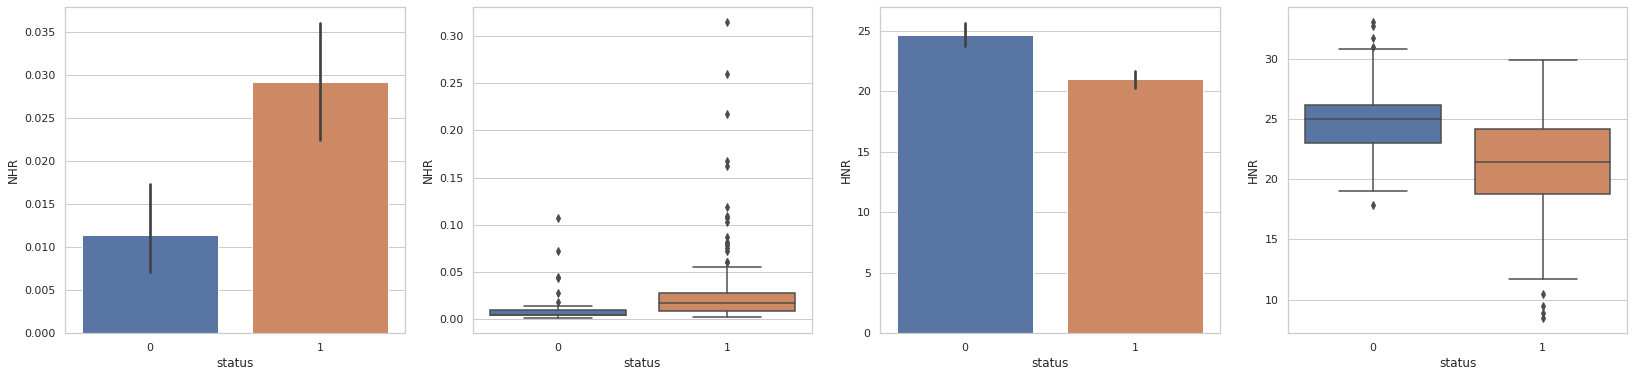

In [300]:
bar("NHR", "HNR")

Here The NHR is lower in PD negative individuals and higher in PD positive individuals, while the HNR is higher in those without the disease than those without it.

In [301]:
#Locating the index numbers of enteries with outlier values.
outliers("NHR",0.05)
outliers("HNR", 30)

Int64Index([ 84,  89,  90,  97,  98,  99, 100, 101, 102, 115, 146, 147, 148,
            149, 150, 151, 152, 157, 192, 193],
           dtype='int64')
Int64Index([31, 32, 33, 34, 35], dtype='int64')


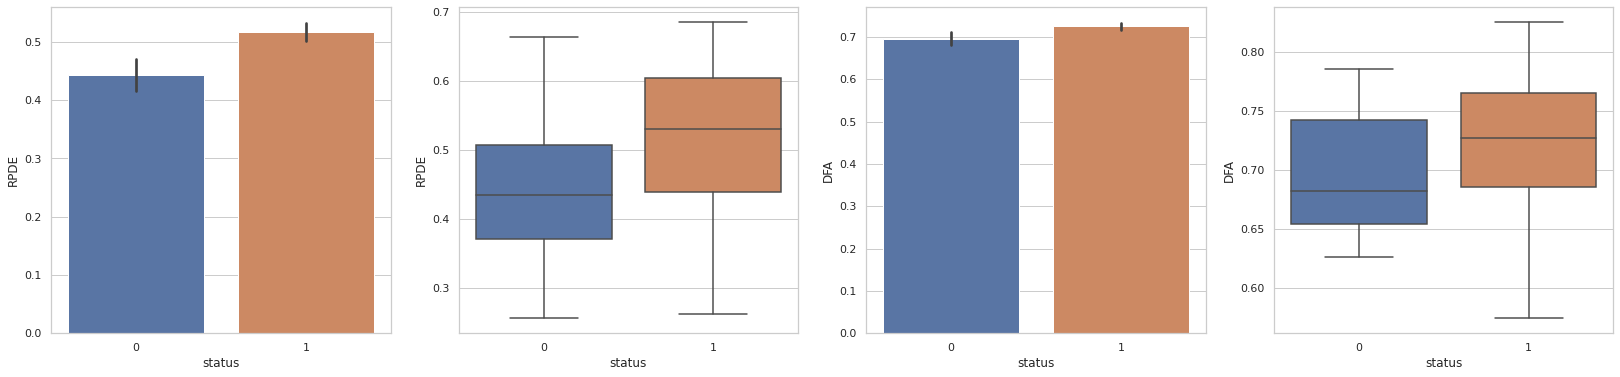

In [302]:
bar("RPDE", "DFA") 

RPDE is higher in PD positive individuals and lower in PD negative individuals. As for DFA, There is only a slight difference between those with and without the disease. It is high in both positive and negative individuals, although it is slightly higher in PD positive individuals.

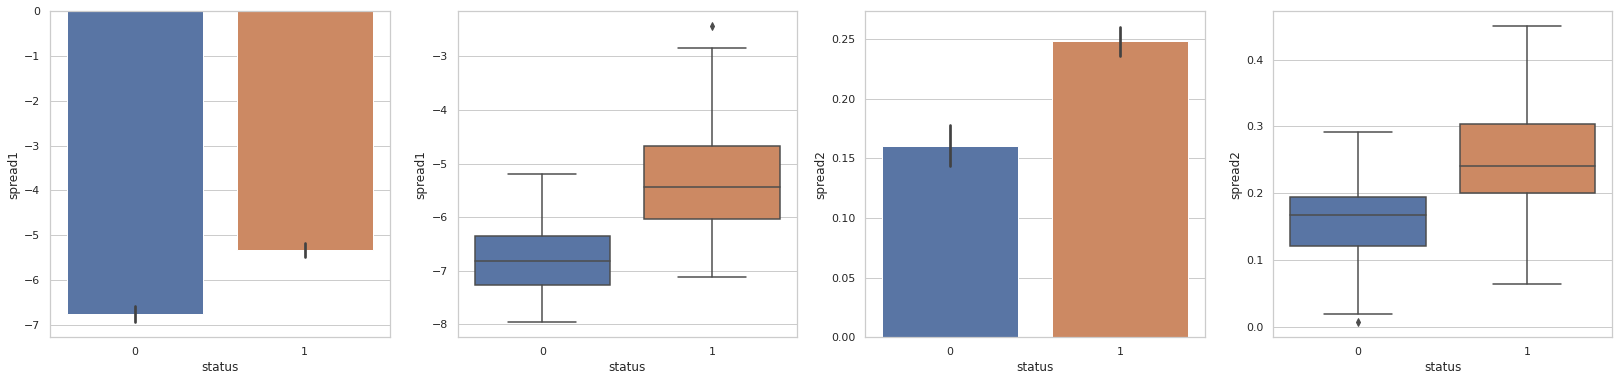

In [303]:
bar("spread1","spread2")

Notice the values in spread1 are higher in PD positive and lower negative individuals.The both start from below zero(0). Spread2 can also be seen to be higher in PD positive and lower in PD negative.

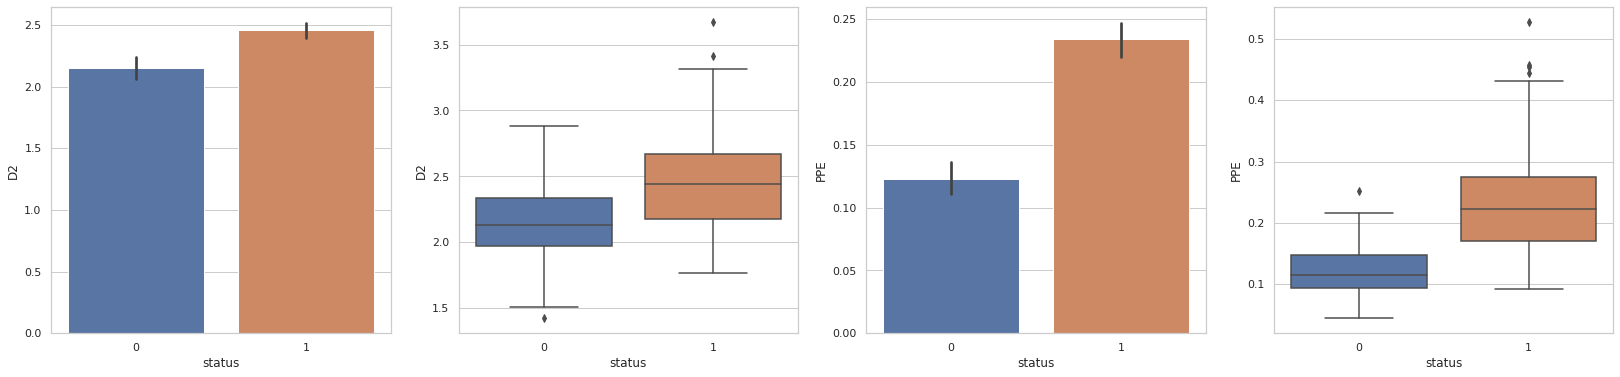

In [304]:
bar("D2", "PPE")

Both D2 and PPE are lower in PD negative and higher in PD positive.

In [305]:
#Locating the index numbers of enteries with outlier values.
outliers("D2",3.4)
outliers("PPE",0.41)

Int64Index([89, 146], dtype='int64')
Int64Index([4, 17, 102, 146, 148, 151, 152], dtype='int64')


#**Dropping extreme outliers**

In [306]:
#A list of the index number of all outliers.
df = df.drop(index = [2, 4, 5,17, 18,19,20, 31, 32, 33, 34, 35, 68, 73, 84, 87,88, 89, 90, 91, 97, 98, 99, 100, 101, 102, 115, 
 116, 117, 118, 120, 141, 146, 147, 148, 149, 150, 151, 152, 153, 154, 157, 186, 187, 189, 192, 193, 194])

**Confirming the the drop of outliers using only columns ("NHR" and "HNR").**

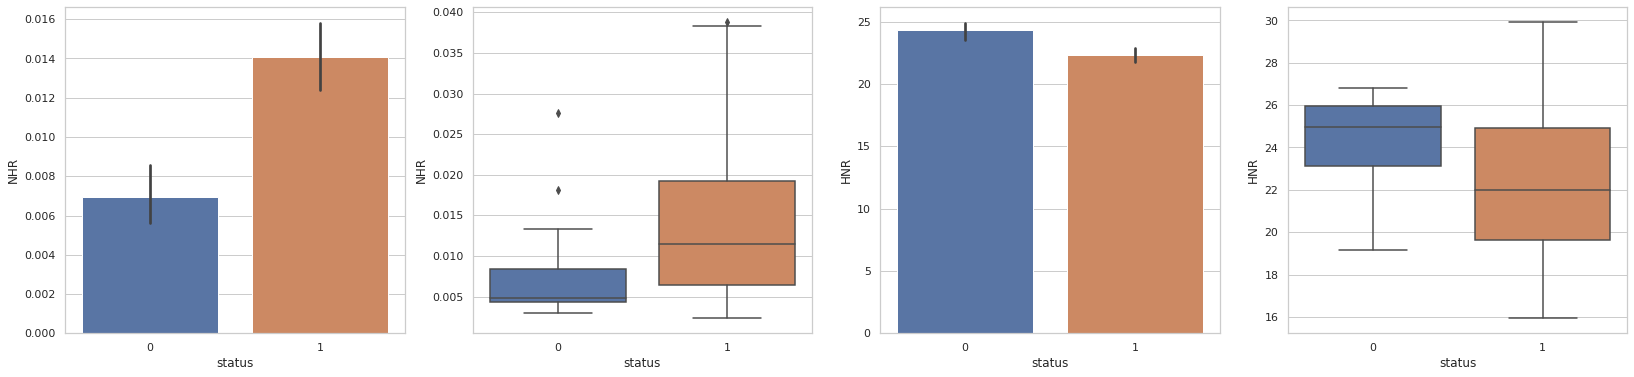

In [307]:
bar("NHR", "HNR")

Dropping of extreme outliers was successfull.

###**Data analysis conclusions:**
**There are some features whose difference in values in both PD negative and PD positive instances is very small. In order for our model to perform well on the dataset, those features will be droped. The features(columns) are: "HNR", "RPDE", "DFA", and "D2"**

In [309]:
#dropping of insignificant features
df = df.drop(columns = ["HNR", "RPDE", "DFA", "D2"])

In [453]:
#Confirrming changes
df.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'status', 'spread1', 'spread2',
       'PPE'],
      dtype='object')

##**Correlation between features**

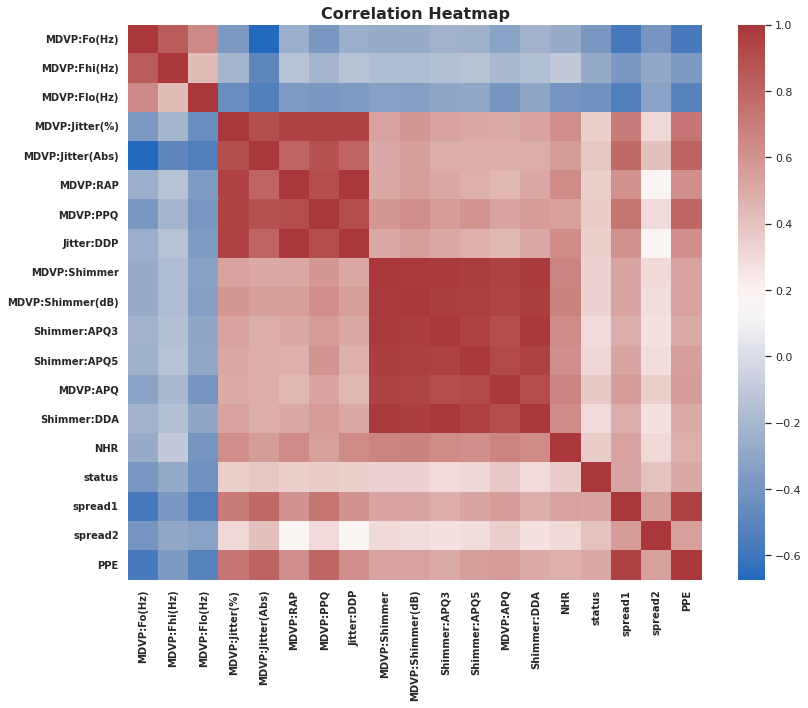

In [310]:
plt.figure(figsize = (12, 10))

corr = df.corr()
sns.heatmap(corr, cmap='vlag');

plt.title('Correlation Heatmap', fontsize = 16, weight='bold')
plt.xticks(fontsize = 10, weight='bold', rotation=90)
plt.yticks(fontsize = 10, weight='bold');

plt.tight_layout()
plt.show;

There appears to be a strong positive correlation amongst 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5','MDVP:APQ'and 'Shimmer:DDA'.
HNR also has a negative correlation most of the features.

###**Checking for inbalance in target vector**

In [311]:
df["status"].unique()

array([1, 0])

In [312]:
print(f'Status(0)_counts:{df[df["status"]==0].shape[0]}')
print(f'Status(1)_counts:{df[df["status"]==1].shape[0]}')


Status(0)_counts:37
Status(1)_counts:110


We can see here that the target Vector is not balanced. This imbalance will be handled during the preprocessing stage.

#**Visualization of Data Clusters through dimentionality reduction(Principal Component Analysis, PCA)**

This data sets has more than one dimention, which makes it impossible to visualize, therefore the principal component analysis(pca), will be used to reduce the dimentionality of the dataset into two dimentions (clusters), thereby making it possible for visualization.

**Assigning Target Vector and Independent Variable**



In [313]:
#Assigning X and y features
X = df.drop(columns ="status")
y = df["status"]

le =LabelEncoder()
z= le.fit_transform(df["status"])


**Scaling Data in preparation for pca**

In [314]:
#Instantiating Scaler
scaler =StandardScaler()
scaled_df = scaler.fit_transform(X)

**Instantiating pca**

In [315]:
#Instantiating pca
pca = PCA(n_components = 2)
pcss =pca.fit_transform(scaled_df)


**Clusters representing Individuals with and without Parkinson's disease.**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


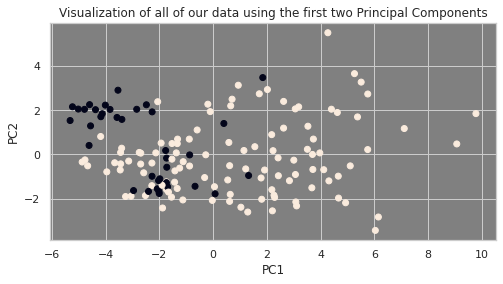

In [316]:
plt.figure(figsize = (8, 4))
#plt.scatter(pcss, c=z)
plt.scatter(pcss[:,0], pcss[:,1], c = z)

ax =plt.axes()
ax.set_facecolor ("grey")
plt.title('Visualization of all of our data using the first two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2');

#**Preprocessing of Data**

Now lets begin processing our data for modelling.

In [317]:
#Train, test, splitting data.
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state = 42)

###**Instantiating Column Selector**

In [318]:
#The dataset contains only numeric columns in this data frame
num_cols = make_column_selector(dtype_include="number")

###**Instantiating Standard scaler**

In [319]:
#Instantiating scaler
scaler =StandardScaler()

In [320]:
#passing scaler and numeric columns into a tuple
num_tuple =(scaler, num_cols)

###**Instantiating Column transformer**

In [321]:
#Transforming tuple for machine learning
column_transformer = make_column_transformer(num_tuple)

#**KNeighbors Classifier Model**

In [322]:
#Instantiating model
knn =KNeighborsClassifier()

**Handling imbalance target vector(y), using SMOTE**

In [323]:
#Instantiating smote
smote = SMOTE(random_state = 42)

In [324]:
#Building pipeline containing  smote and knn model.
KS_pipe = Pipeline([("smote", smote), ("knn", knn)])

In [325]:
#Fitting pipe on data
knn_pipe = make_pipeline(column_transformer, KS_pipe)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f89e5660690>)])),
                ('pipeline',
                 Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                 ('knn', KNeighborsClassifier())]))])

**Tuning for the best parameters**

In [326]:
knn_pipe.get_params()

{'columntransformer': ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f89e5660690>)]),
 'columntransformer__n_jobs': None,
 'columntransformer__remainder': 'drop',
 'columntransformer__sparse_threshold': 0.3,
 'columntransformer__standardscaler': StandardScaler(),
 'columntransformer__standardscaler__copy': True,
 'columntransformer__standardscaler__with_mean': True,
 'columntransformer__standardscaler__with_std': True,
 'columntransformer__transformer_weights': None,
 'columntransformer__transformers': [('standardscaler',
   StandardScaler(),
   <sklearn.compose._column_transformer.make_column_selector at 0x7f89e5660690>)],
 'columntransformer__verbose': False,
 'columntransformer__verbose_feature_names_out': True,
 'memory': None,
 'pipeline': Pipeline(steps=[('smote', SMOTE(random_state=42)),
                 ('knn', KNeighborsClassifier())]),
 'pipeline__knn

In [327]:
#Getting parameters for model tuning
params = {'pipeline__knn__n_neighbors': [5,7,9,11],
          'pipeline__knn__weights': ["uniform", "distance"],
          'pipeline__knn__p':[2,3,4]}

##**Instantiating the GridSearch with Knn pipeline and parameters**



In [328]:
knn_gs =GridSearchCV(knn_pipe, params)
knn_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f89e5660690>)])),
                                       ('pipeline',
                                        Pipeline(steps=[('smote',
                                                         SMOTE(random_state=42)),
                                                        ('knn',
                                                         KNeighborsClassifier())]))]),
             param_grid={'pipeline__knn__n_neighbors': [5, 7, 9, 11],
                         'pipeline__knn__p': [2, 3, 4],
                         'pipeline__knn__weights': ['uniform', 'distance']})

In [329]:
#Retrieving the best parameters
knn_gs.best_params_

{'pipeline__knn__n_neighbors': 5,
 'pipeline__knn__p': 4,
 'pipeline__knn__weights': 'uniform'}

In [330]:
best_knn_pipe = knn_gs.best_estimator_

#**Predictions**

In [331]:
#Prediction using the best parameters
train_knn_preds = best_knn_pipe.predict(X_train)
test_knn_preds =best_knn_pipe.predict(X_test)

###**Classification Report on KNeigbor Classifier**

In [332]:
train_report = classification_report(y_train, train_knn_preds)
test_report = classification_report(y_test, test_knn_preds)

In [333]:
print(f'Evaluation metrics on Knn model with tuned parameters\n\n Train set:\n{train_report}')
print("______________________________________\n")
print(f'Evaluation metrics on Knn model with tuned parameters\n\n Test set:\n{test_report}')

Evaluation metrics on Knn model with tuned parameters

 Train set:
              precision    recall  f1-score   support

           0       0.70      0.88      0.78        26
           1       0.96      0.88      0.92        84

    accuracy                           0.88       110
   macro avg       0.83      0.88      0.85       110
weighted avg       0.90      0.88      0.89       110

______________________________________

Evaluation metrics on Knn model with tuned parameters

 Test set:
              precision    recall  f1-score   support

           0       0.69      1.00      0.81        11
           1       1.00      0.81      0.89        26

    accuracy                           0.86        37
   macro avg       0.84      0.90      0.85        37
weighted avg       0.91      0.86      0.87        37



###**Confusion Matrix on KNeigbor Classifier**

**Train**

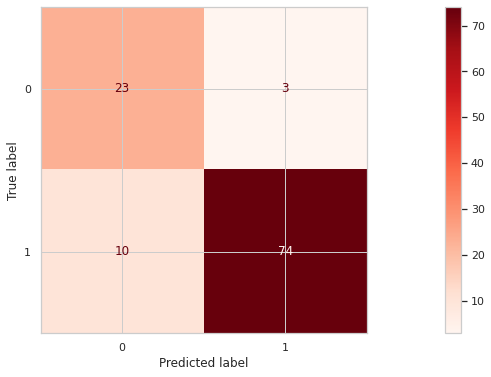

In [334]:
ConfusionMatrixDisplay.from_estimator(best_knn_pipe, X_train, y_train, cmap ="Reds");

The KNN model did not do well in predicting the true positives and the true negatives for the train set. It predicted 10, false negative and 3 false positive.

**Test**

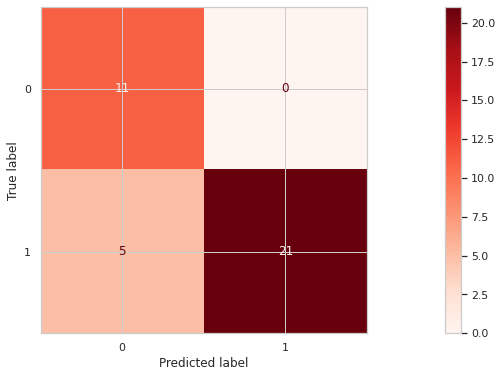

In [335]:
ConfusionMatrixDisplay.from_estimator(best_knn_pipe, X_test, y_test, cmap="Reds");

Although, the KNN model did poor on the train set, it performed better on the test set, this is a sign of underfit. It predicted 5 false negative, but did well in predicting the false false positives, true positives and true negatives. 

#**Instantiating the Light Classifier**

In [416]:
lgbm =LGBMClassifier(num_leaves=37, objective='binary')

#Instantiating smote for handling imbalanced y target vector.
smote = SMOTE(random_state = 42)


In [417]:
#Creating a pipeline to contain smote and the lgbm classifier
LS_pipe = Pipeline([("smote", smote),("lgbm", lgbm)])

In [418]:
lgbm_pipe = make_pipeline(column_transformer, LS_pipe)

#Fitting lgbm classifier, scaler and smote on the X and y train.
lgbm_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f89e5660690>)])),
                ('pipeline',
                 Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                 ('lgbm',
                                  LGBMClassifier(num_leaves=37,
                                                 objective='binary'))]))])

##**Predictions**

In [420]:
lgbm_train_preds = lgbm_pipe.predict(X_train)
lgbm_test_preds = lgbm_pipe.predict(X_test)

###**Model Evaluation**

In [421]:
lgbm_train_report =classification_report(y_train, lgbm_train_preds)
lgbm_test_report = classification_report(y_test, lgbm_test_preds)

In [422]:
print(f'Evaluation metrics on Knn model with tuned parameters\n\n Train set:\n{lgbm_train_report}')
print("______________________________________\n")
print(f'Evaluation metrics on Knn model with tuned parameters\n\n Test set:\n{lgbm_test_report}')

Evaluation metrics on Knn model with tuned parameters

 Train set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        84

    accuracy                           1.00       110
   macro avg       1.00      1.00      1.00       110
weighted avg       1.00      1.00      1.00       110

______________________________________

Evaluation metrics on Knn model with tuned parameters

 Test set:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.96      0.98        26

    accuracy                           0.97        37
   macro avg       0.96      0.98      0.97        37
weighted avg       0.98      0.97      0.97        37



##**Confusion Matrices for model performance evaluation**

###**Train Set**

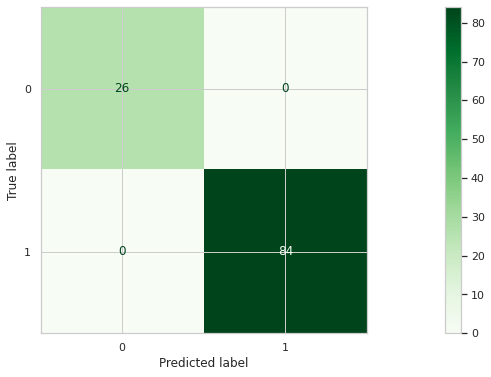

In [423]:
ConfusionMatrixDisplay.from_estimator(lgbm_pipe, X_train, y_train, cmap ="Greens");

The IGBM model performed accurately on the train set

###**Test Set**

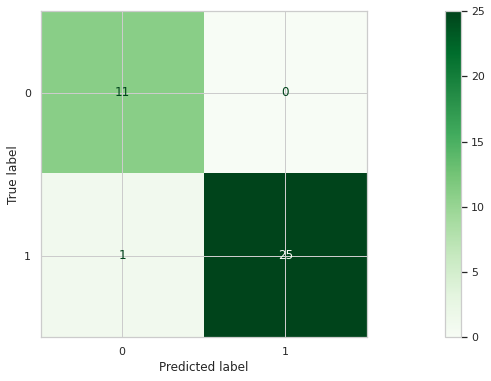

In [424]:
ConfusionMatrixDisplay.from_estimator(lgbm_pipe, X_test, y_test, cmap="Greens");

The model also performed well on the test set. It had predicted only 1 false negative.

#**XGBoost Classifier(xGBC)**

###**Instantiating Model**

In [425]:
#Setting parameters for tuning
params = {'max_depth': [3,6,10], "learning_rate": [0.01, 0.05, 0.1], "n_estimators": [100, 500, 1000], "colsample_bytree":[0.3, 0.7]}

In [426]:
#Instantiating model and fitting on x, y train
xgbr = GridSearchCV(XGBClassifier(seed = 20), params)
xgbr.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(seed=20),
             param_grid={'colsample_bytree': [0.3, 0.7],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 6, 10],
                         'n_estimators': [100, 500, 1000]})

In [428]:
#Extracting best parameters
xgbr.best_params_

{'colsample_bytree': 0.3,
 'learning_rate': 0.01,
 'max_depth': 6,
 'n_estimators': 100}

In [450]:
xgbr_params=xgbr.best_estimator_

In [451]:
#Instantiating pipeline with smot and xgbr with best parameters
XS_pipe = Pipeline([("smote", SMOTE(random_state = 42)),("xgbr",xgbr_params)])

In [452]:
xgb_pipe= make_pipeline(column_transformer, XS_pipe)

In [432]:
#Fitting pipe on x, y train
xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f89e5660690>)])),
                ('pipeline',
                 Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                 ('xgbr',
                                  XGBClassifier(colsample_bytree=0.3,
                                                learning_rate=0.01, max_depth=6,
                                                seed=20))]))])

###**Predictions**

In [433]:
xgb_train_preds = xgb_pipe.predict(X_train)
xgb_test_preds = xgb_pipe.predict(X_test)

###**Model Evaluation**

In [434]:
xgb_train_report =classification_report(y_train, xgb_train_preds)
xgb_test_report = classification_report(y_test, xgb_test_preds)

In [435]:
print(f'Evaluation metrics on Gradient Boosting Classifier\n\n Train set:\n{xgb_train_report}')
print("______________________________________\n")
print(f'Evaluation metrics on Gradient Boosting Classifier\n\n Test set:\n{xgb_test_report}')

Evaluation metrics on Gradient Boosting Classifier

 Train set:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        26
           1       0.99      0.99      0.99        84

    accuracy                           0.98       110
   macro avg       0.97      0.97      0.97       110
weighted avg       0.98      0.98      0.98       110

______________________________________

Evaluation metrics on Gradient Boosting Classifier

 Test set:
              precision    recall  f1-score   support

           0       0.69      1.00      0.81        11
           1       1.00      0.81      0.89        26

    accuracy                           0.86        37
   macro avg       0.84      0.90      0.85        37
weighted avg       0.91      0.86      0.87        37



#**Confusion Matrix**

**Train set**

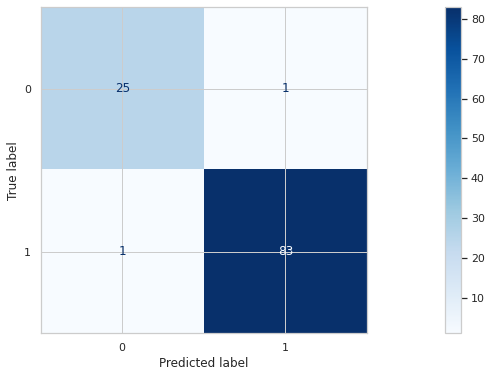

In [437]:
ConfusionMatrixDisplay.from_estimator(xgb_pipe, X_train, y_train, cmap ="Blues");

The XGB model did relatively well on the train set, although it has 1 false negative error and 1 false positive error.

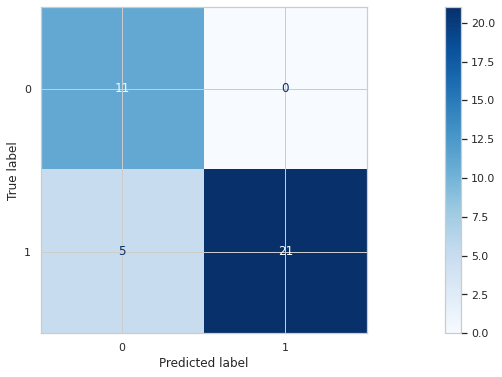

In [438]:
ConfusionMatrixDisplay.from_estimator(xgb_pipe, X_test, y_test, cmap ="Blues");

The model didnt perform so well on the test set. It predicted 5 false negatives, which is'nt good for model built for predicting the presence or absence of disease.

##**Defining a function to return the comparison and differences of the scores of all three models.**

In [439]:
def models(model, X_train, X_test, y_train, y_test, scoring = "accuracy", model_name = "Classifier"):

  scoring_func = get_scorer(scoring)
  train_score = scoring_func(model, X_train, y_train)
  test_score = scoring_func(model, X_test, y_test)

  delta_score  = train_score -test_score
  

  score_dict ={f'{scoring}:train': train_score,
               f'{scoring}:test': test_score,
               f'{scoring}:difference' : delta_score}

  score_frame = pd.DataFrame(score_dict, index=[model_name])

  return(score_frame)

##**Model Comparison**

In [440]:
models_report= models(lgbm_pipe, X_train, X_test, y_train, y_test, model_name ="LGBM Classifier")
models_report= models_report.append(models(best_knn_pipe, X_train, X_test, y_train, y_test, model_name ="KNN Classifier"))
models_report= models_report.append(models(xgb_pipe, X_train, X_test, y_train, y_test, model_name ="XGBoost Classifier"))

models_report

,accuracy:train,accuracy:test,accuracy:difference
LGBM Classifier,1.000000,0.972973,0.027027
KNN Classifier,0.881818,0.864865,0.016953
XGBoost Classifier,0.981818,0.864865,0.116953


#**Conclusion**

>**The results from the evaluation of all three models reveals that the LGBM classifier had the highest score on both the train set and the test set, with 100% and 97% respectively.The model with the next highest score is the XGBoost Classifier, with 98% on the train set and 86% on the test set. KNN Classifier. had the lowest score with 88% on train set and 86% on test set**



>**Therefore the most suitable model among LGBM Classifier, KNN Classifier and XGBoost Classifier for the prediction of parkinson disease in divididuals is the LGBM Classifier.**







